## Tidak Kenal maka Tidak Sayang

- Nama : Ferly Jeremi Purnawan Apiang
- NRP : 1973005


# Training classifier dengan Decision Tree

Pembahasan ini akan membahas tentang **Training Classifier dengan Decision Tree** yang merupakan model machine learning.

## Classification Task dengan Decision Tree
Tanpa berlama-lama langsung masuk ke dalam Classification.

## Load Dataset

In [47]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}')

Dimensi Feature: (569, 30)
Class: {0, 1}


- Pertama Lakukan pemanggilan dengan memanggil datasetnya (import load_breast_cancer)
- Panggil loadnya dengan menanampungnya ke dalam variable yang saya beri nama X dan y
- Lalu saya ingin mengetahui dimensi dari datasetnya saya panggil Print X.shape dan set{y} untuk class.

Hasil yang dikeluarkan yaitu Data Feature adalah (569, 30) terdapat 569 Baris dan 30 kolom. Lalu dengan class pada target labelnya terdapat {0, 1}

## Training Testing
Masuk dengan pemanggilan Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

- Penggunaan Model Sklearn "from sklearn.model_selection lalu untuk Testing kita import train_test_split".
- Lalu kita panggil train_test_split nya, lalu kita sertakan X dan y (variable masing-masing) sebagai parameternya.
- Lalu terkait parameter test_size nya kita set sebagai 0.3 yang artinya disini testing set nya akan menempati 30% dari total keseluruhan dataset yang kita miliki.
- Lalu berikutnya untuk random_state kita beri nilai 0.
- Pemanggilan fungsi train_test_split ini akan menghasilkan 4 kumpulan data, keempatnya perlu ditampung ke dalam 4 buah variabel yaitu X_train, X_test, y_train, dan y_test.

# Classification `DecisionTreeClassifier` dengan Sklearn

Penggunaan Decision Tree Untuk melakukan Klasifikasi dengan **Dataset Breast Cancer**

In [49]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

- Langkah Awal yaitu pasti kita harus memanggil Sklearn untuk metodenya lalu import DecisionTreeClassifier untuk classifikasi yang dipilih.
- Berikutnya bentuk sebuah objek dari class Desicion Tree Classifier dengan menyertakan parameter (max_depth) yang kita set sebagai 4 (agar bisa untuk dimasukan kedalam Training Classifikasi) yang berarti Desicion Tree Classifier yang kita hasilkan itu memiliki kedalaman maksimum 4 layer.
- Untuk berikutnya akan kita training dengan memanggil method "model.fit" yang dimana proses training ini akan melibatkan (X_train, y_train) sebagai training setnya.

## Visualisasi

dari hasil decision Tree tersebut kita akan panggil untuk menampilkan gambar agar lebih pahan dengan menggunakan matplotlib.

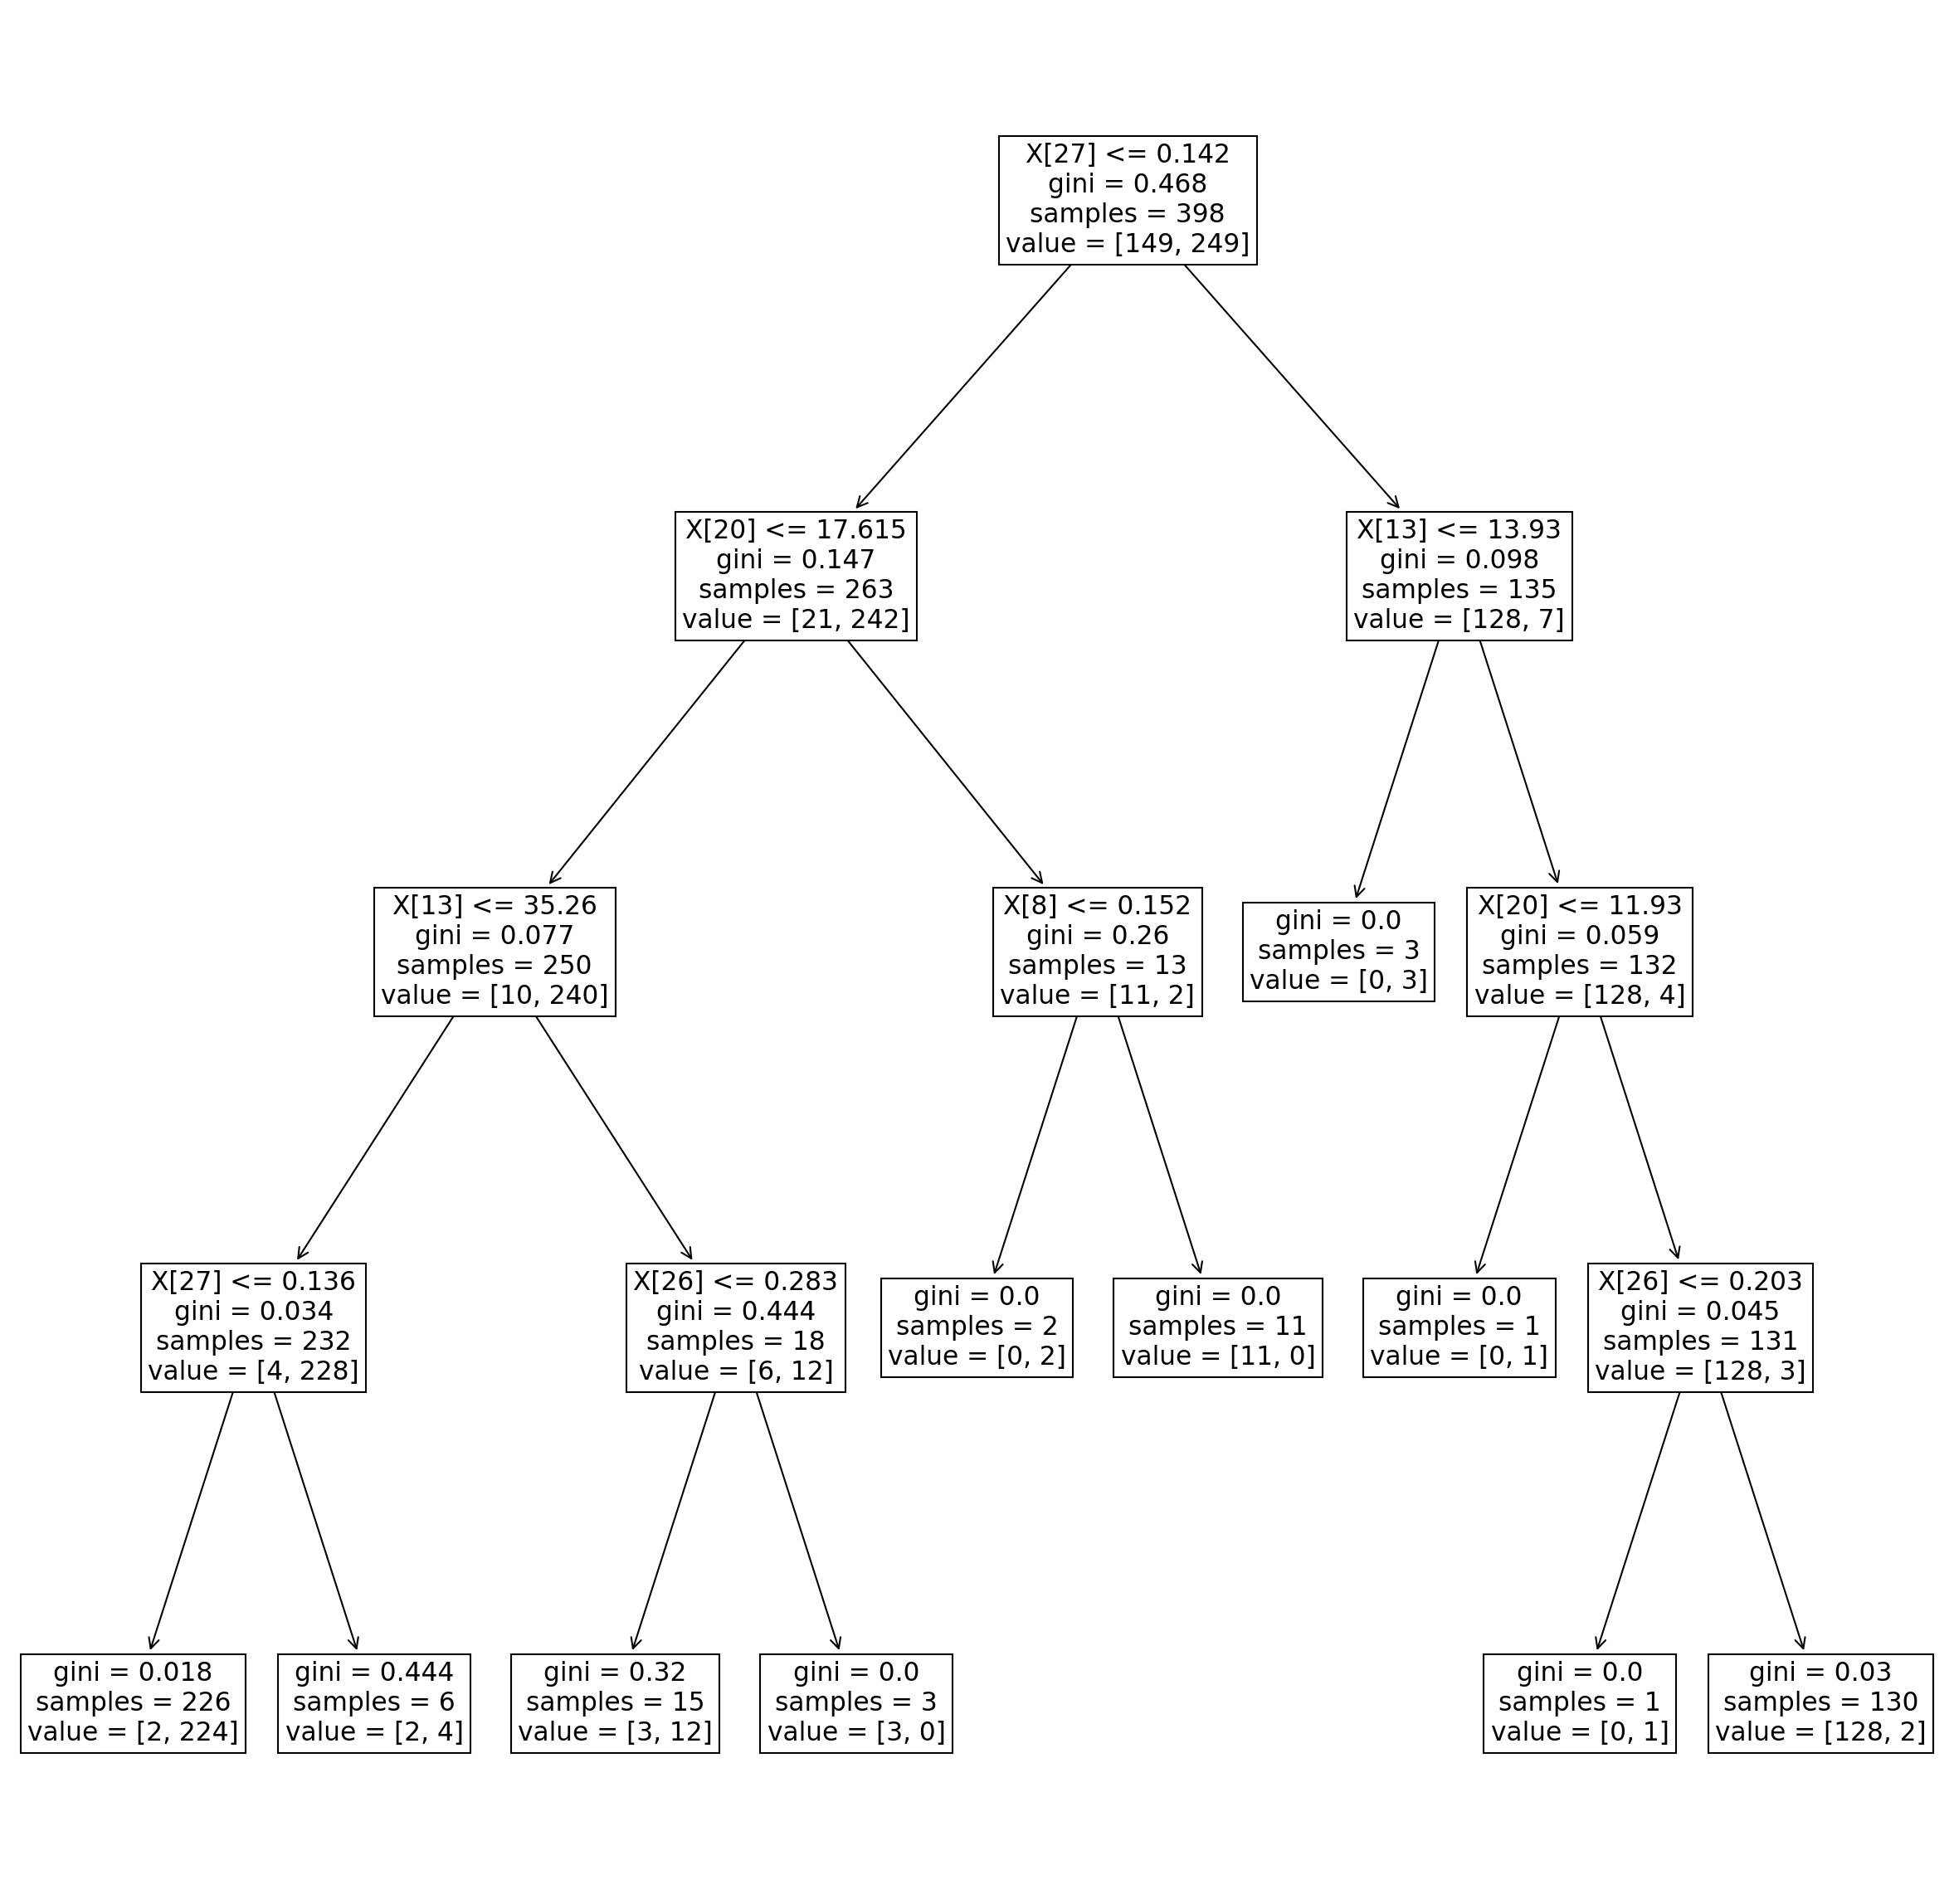

In [50]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 150
plt.subplots(figsize=(20, 20))
tree.plot_tree(model, fontsize = 15)
plt.show()

- Pertama-tama lakukan import yaitu "import matplotlib.pyplot as plt" untuk tampilan dari table turunan dan "from sklearn import tree".
- kasus kali ini, kita akan set di 150 dpi dengan pemanggilan method (disesuaikan kebutuhan) "plt.rcParams['figure.dpi'] = 150".
- Selanjutnya kita akan siapkan figure nya dengan memanggil "plt.subplots" dengan mengatur atau mengeset figsize nya kita set (20, 20).
- Lalu berikutnya untuk melakukan plotting model Desicion Tree, kita bisa memanggil "tree.plot_tree" dengan menyertakan parameter (model) dan (fontsize) yang kita set pada angka 15 (kebutuhan dan kerapihan bisa disesuaikan sesuai selera ukurannyanya).
- Terakhir disini kita tinggal tampilkan pada layar dengan memanggi method "plt.show()".

## Evaluasi Model 

Pencobaan untuk melakukan evaluasi untuk perfirma dari Desicion Tree yang akan dijalankan training dengan memanfaatkan **Classification Report**

In [51]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        63
           1       0.96      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



- Pemanggilan method "from sklearn.metrics import classification_report" untuk melakukan Evalution test.
- Lalu berikutnya kita akan melakukan prediksi dengan memanggil method "model.predict" dengan memanfaatkan testing_set kita (X_test), yang hasil prediksinya akan ditampung kedalam variabel y_pred.
- Untuk selanjutnya akan kita evaluasi dengan menggunakan classification_report dengan menyertakan parameter y_test dan y_pred.
-  Bisa dilihat bahwa kolom nilai precission, recall, f1-score, support, serta kolom nilai accuracy nya sebagai peforma dari **Desicion Tree** model yang telah kita gunakan.

# Pandas untuk Classification Report

Agar tampilann lebih Rapih kita perlu untuk menggunakan pandas agar semuanya lebih tertata.

In [52]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV

In [53]:
X, y = make_classification(n_samples=1000, n_features=30,
                           n_informative=12,
                           n_clusters_per_class=1, n_classes=10,
                           class_sep=2.0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y)


clf = LogisticRegressionCV(max_iter=1000, random_state=42).fit(X_train, y_train)



df = pd.DataFrame(classification_report(clf.predict(X_test), 
                                        y_test, digits=2,
                                        output_dict=True)).T

df['support'] = df.support.apply(int)

df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'1', :'f1-score'])

C:\Users\ferly\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,precision,recall,f1-score,support
0,0.933333,0.823529,0.875000,34
1,0.935484,0.966667,0.950820,30
2,0.903226,0.965517,0.933333,29
3,0.965517,0.875000,0.918033,32
4,0.966667,0.805556,0.878788,36
5,0.833333,0.892857,0.862069,28
6,0.896552,0.962963,0.928571,27
7,0.800000,0.960000,0.872727,25
8,0.833333,0.892857,0.862069,28
9,1.000000,0.967742,0.983607,31


- langka pemanggilan ada banyak sekali tapi kalian bisa lihat saya sudah memisahkan apa-apa saja yang perlu diimport.
- Masuk untuk membuat classification Dengan menentukan samples saya memberi batas 1000 lalu, featuresnya saya beri jarak 30.
- df.suport.apply fungsinya untuk menentukan berapa kemungkinan orang yang terkena.

Ya jadi demikian Training Classifier menggunakan **Desicion Tree Dataset Breast Cancer Dataset**